In [73]:
!pip install scikit-learn

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from scipy import stats

In [4]:
# Carregar os dados
df = pd.read_feather("/content/credit_scoring.ftr")

In [5]:
df.head(10)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False
5,2015-01-01,7382,F,N,S,1,Assalariado,Superior completo,Casado,Casa,45,24.315068,3.0,25387.16,False
6,2015-01-01,1462,F,S,S,2,Empresário,Superior completo,Casado,Casa,38,9.926027,4.0,3544.27,False
7,2015-01-01,14967,M,N,S,0,Assalariado,Superior completo,Casado,Com os pais,40,8.690411,2.0,5331.02,False
8,2015-01-01,5033,F,S,S,2,Servidor público,Fundamental,Casado,Casa,38,15.643836,4.0,4758.30,False
9,2015-01-01,12422,F,N,S,0,Pensionista,Médio,Casado,Casa,60,NaN,2.0,1929.08,True


In [6]:
df.dtypes

,0
data_ref,datetime64[ns]
index,int64
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

In [8]:
df.isnull().sum()

,0
data_ref,0
index,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0


In [9]:
# Substituir NaN por 0
df.fillna(0, inplace=True)

# Exibir DataFrame modificado
print("\nDataFrame modificado (NaN substituído por 0):")


DataFrame modificado (NaN substituído por 0):


In [10]:
# Transformar a coluna 'coluna_inteira' de int para float
df['qtd_filhos'] = df['qtd_filhos'].astype(float)

In [11]:
# Transformar True em 1.0 e False em 2.0
df['mau'] = df['mau'].replace({True: 1.0, False: 2.0})

<ipython-input-11-879b3346b892>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mau'] = df['mau'].replace({True: 1.0, False: 2.0})


In [12]:
# Converter datetime para float (timestamp)
df['data_ref'] = df['data_ref'].astype('int64') / 1e9  # Divide por 1e9 para converter de nanosegundos para segundos

# Exibir DataFrame modificado
print("\nDataFrame modificado com data como float:")


DataFrame modificado com data como float:


In [13]:
df.dtypes

,0
data_ref,float64
index,int64
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,float64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object


In [14]:
# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o MinMaxScaler às quatro colunas
df[['qtd_filhos','data_ref', 'renda', 'mau']] = scaler.fit_transform(df[['qtd_filhos', 'data_ref', 'renda', 'mau']])

# Exibir DataFrame modificado
print("\nDataFrame modificado com MinMaxScaler:")
print(df)


DataFrame modificado com MinMaxScaler:
        data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
0            0.0   5733    F                N               N    0.000000   
1            0.0    727    F                S               S    0.000000   
2            0.0   6374    F                N               N    0.142857   
3            0.0   9566    F                N               N    0.000000   
4            0.0   9502    F                S               N    0.000000   
...          ...    ...  ...              ...             ...         ...   
749995       1.0  13689    M                N               S    0.000000   
749996       1.0   7000    F                N               S    0.000000   
749997       1.0  14023    M                S               N    0.142857   
749998       1.0   2396    F                N               S    0.000000   
749999       1.0  14026    M                S               N    0.142857   

         tipo_renda             edu

In [15]:
# Converter a coluna 'data_ref' de volta para datetime a partir do timestamp
df['data_ref'] = pd.to_datetime(df['data_ref'], unit='s')

In [16]:
# Definir a data de corte para separar os últimos 3 meses
data_corte = df['data_ref'].max() - pd.DateOffset(months=3)

# Separar os dados em conjunto de treino e conjunto OOT
df_oot = df[df['data_ref'] > data_corte]  # Dados OOT (últimos 3 meses)
df_treino = df[df['data_ref'] <= data_corte]  # Dados de treinamento

# Excluir as colunas que não devem ser utilizadas na modelagem
df_treino = df_treino.drop(columns=['data_ref', 'index'])
df_oot = df_oot.drop(columns=['data_ref', 'index'])

# Exibir os resultados
print("\nDados de Treinamento:")
print(df_treino)

print("\nDados Out of Time (OOT):")
print(df_oot)


Dados de Treinamento:
Empty DataFrame
Columns: [sexo, posse_de_veiculo, posse_de_imovel, qtd_filhos, tipo_renda, educacao, estado_civil, tipo_residencia, idade, tempo_emprego, qt_pessoas_residencia, renda, mau]
Index: []

Dados Out of Time (OOT):
       sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0         F                N               N    0.000000   Empresário   
1         F                S               S    0.000000  Assalariado   
2         F                N               N    0.142857  Assalariado   
3         F                N               N    0.000000  Assalariado   
4         F                S               N    0.000000  Assalariado   
...     ...              ...             ...         ...          ...   
749995    M                N               S    0.000000   Empresário   
749996    F                N               S    0.000000  Pensionista   
749997    M                S               N    0.142857  Assalariado   
749998    F           

In [17]:
# 1. Descrever a base
total_linhas = len(df)
linhas_por_mes = df['data_ref'].dt.to_period('M').value_counts().sort_index()

print("Número total de linhas:", total_linhas)
print("\nNúmero de linhas por mês em data_ref:")
print(linhas_por_mes)

Número total de linhas: 750000

Número de linhas por mês em data_ref:
data_ref
1970-01    750000
Freq: M, Name: count, dtype: int64


In [18]:
# Descritiva para variáveis quantitativas
descritiva_quantitativa = df.describe()

# Descritiva para variáveis qualitativas
descritiva_qualitativa = df['qtd_filhos'].value_counts()  # Para variáveis categóricas

# Para outras variáveis qualitativas, você pode usar .astype(str) ou selecionar colunas específicas

print("\nDescritiva básica univariada (quantitativas):")
print(descritiva_quantitativa)

print("\nDescritiva básica univariada (qualitativas):")
print(descritiva_qualitativa)


Descritiva básica univariada (quantitativas):
                            data_ref          index     qtd_filhos  \
count                         750000  750000.000000  750000.000000   
mean   1970-01-01 00:00:00.499450980    8319.272793       0.030946   
min              1970-01-01 00:00:00       0.000000       0.000000   
25%    1970-01-01 00:00:00.211764706    4147.000000       0.000000   
50%    1970-01-01 00:00:00.498823529    8324.000000       0.000000   
75%    1970-01-01 00:00:00.785882353   12487.000000       0.071429   
max              1970-01-01 00:00:01   16649.000000       1.000000   
std                              NaN    4809.281774       0.052813   

               idade  tempo_emprego  qt_pessoas_residencia          renda  \
count  750000.000000  750000.000000          750000.000000  750000.000000   
mean       43.804733       6.447258               2.212241       0.005664   
min        22.000000       0.000000               1.000000       0.000000   
25%        34.

Matriz de Correlação:
               renda  qtd_filhos
renda       1.000000   -0.041886
qtd_filhos -0.041886    1.000000


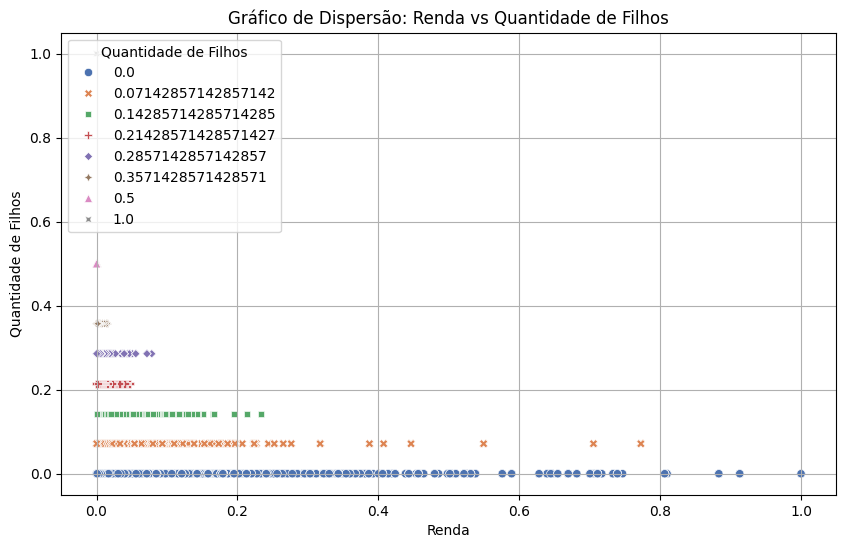

In [19]:
# 1. Correlação entre variáveis quantitativas
correlacao = df[['renda', 'qtd_filhos']].corr()

print("Matriz de Correlação:")
print(correlacao)

# 2. Gráfico de dispersão entre renda e outra_variavel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='renda', y='qtd_filhos', hue='qtd_filhos', style='qtd_filhos', palette='deep')
plt.title('Gráfico de Dispersão: Renda vs Quantidade de Filhos')
plt.xlabel('Renda')
plt.ylabel('Quantidade de Filhos')
plt.legend(title='Quantidade de Filhos', loc='upper left')
plt.grid()
plt.show()

In [20]:
# Amostrando 10% dos dados
df_sample = df.sample(frac=0.1, random_state=42)

# 3. Tabela de contingência para variáveis qualitativas usando a amostra
tabela_contingencia = pd.crosstab(df_sample['qtd_filhos'], df_sample['renda'], margins=True)
print("\nTabela de Contingência entre Quantidade de Filhos e Renda (10% dos dados):")
print(tabela_contingencia)


Tabela de Contingência entre Quantidade de Filhos e Renda (10% dos dados):
renda       0.0  0.000005  0.000006  0.000013  0.000016  0.000016  0.000017  \
qtd_filhos                                                                    
0.0           1         2         0         3         0         2         1   
0.071429      0         0         1         0         0         0         0   
0.142857      0         0         0         0         1         0         0   
0.214286      0         0         0         0         0         0         0   
0.285714      0         0         0         0         0         0         0   
0.357143      0         0         0         0         0         0         0   
0.5           0         0         0         0         0         0         0   
1.0           0         0         0         0         0         0         0   
All           1         2         1         3         1         2         1   

renda       0.000018  0.000021  0.000021  ...  0.66918

In [21]:
# Identificando outliers usando o IQR
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando outliers
df = df[~((df['renda'] < (Q1 - 1.5 * IQR)) | (df['renda'] > (Q3 + 1.5 * IQR)))]

In [22]:
# Exemplo: substituindo zeros em 'renda' com a média da renda
df['renda'] = np.where(df['renda'] == 0, df['renda'].mean(), df['renda'])

<ipython-input-22-53c70586f1c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renda'] = np.where(df['renda'] == 0, df['renda'].mean(), df['renda'])


In [23]:
df.head(5)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,1970-01-01,5733,F,N,N,0.000000,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,0.000590,1.0
1,1970-01-01,727,F,S,S,0.000000,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,0.000752,1.0
2,1970-01-01,6374,F,N,N,0.142857,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,0.000361,1.0
3,1970-01-01,9566,F,N,N,0.000000,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,0.003333,1.0
4,1970-01-01,9502,F,S,N,0.000000,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,0.000682,1.0


In [31]:
# Definindo variáveis independentes (X) e dependentes (y)
X = df.drop(columns=['mau'])  # Variável independente
y = df['mau']  # Variável dependente

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Converter datetime para float (timestamp)
df['data_ref'] = df['data_ref'].astype('int64') / 1e9  # Divide por 1e9 para converter de nanosegundos para segundos

# Exibir DataFrame modificado
print("\nDataFrame modificado com data como float:")


DataFrame modificado com data como float:


In [33]:
df.dtypes

,0
data_ref,float64
index,int64
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,float64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object


In [38]:
# Identifique colunas categóricas (incluindo aquelas com dtype 'objeto')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Crie um objeto LabelEncoder
label_encoder = LabelEncoder()

# Codifique recursos categóricos em conjuntos de treinamento e teste
for col in categorical_cols:
    # Ajuste o codificador nos dados de treinamento e transforme ambos
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [51]:
# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Ajustando o modelo
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Previsões
y_pred = model.predict(X_test_scaled)

# Avaliação do modelo
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     11668
         1.0       0.91      1.00      0.95    122518

    accuracy                           0.91    134186
   macro avg       0.46      0.50      0.48    134186
weighted avg       0.83      0.91      0.87    134186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Usando statsmodels para obter os coeficientes e p-valores
X_train_sm = sm.add_constant(X_train_scaled)  # Adicionando o intercepto
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.265619
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    mau   No. Observations:               536742
Model:                          Logit   Df Residuals:                   536727
Method:                           MLE   Df Model:                           14
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.09936
Time:                        14:26:49   Log-Likelihood:            -1.4257e+05
converged:                       True   LL-Null:                   -1.5830e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9205      0.009    342.461      0.000       2.904       2.937
x1            -0.0743      0.

In [54]:
# Fazendo previsões
X_test_sm = sm.add_constant(X_test_scaled)  # Adicionando o intercepto para os dados de teste
y_pred_probs = result.predict(X_test_sm)  # Previsões de probabilidade
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertendo as probabilidades em classes

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.91


In [82]:
def calculate_ks(y_true, y_pred_probs):

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    ks_value = max(tpr - fpr)
    ks_threshold = thresholds[np.argmax(tpr - fpr)]
    return ks_value, ks_threshold

# Após treinar o modelo e fazer previsões
y_pred_probs = result.predict(X_test_sm)  # Probabilidades previstas

# Calcular KS
ks_value, ks_threshold = calculate_ks(y_test, y_pred_probs)

print(f"Valor da estatística KS: {ks_value:.4f}")
print(f"Limiar onde KS é alcançado: {ks_threshold:.4f}")

Valor da estatística KS: 0.3864
Limiar onde KS é alcançado: 0.8886


In [81]:
def calculate_gini(y_true, y_pred_probs):

    auc = roc_auc_score(y_true, y_pred_probs)
    gini = 2 * auc - 1
    return gini

# Após treinar o modelo e fazer previsões
y_pred_probs = result.predict(X_test_sm)  # Probabilidades previstas

# Calcular Gini
gini_value = calculate_gini(y_test, y_pred_probs)

print(f"Coeficiente de Gini: {gini_value:.4f}")

Coeficiente de Gini: 0.5099


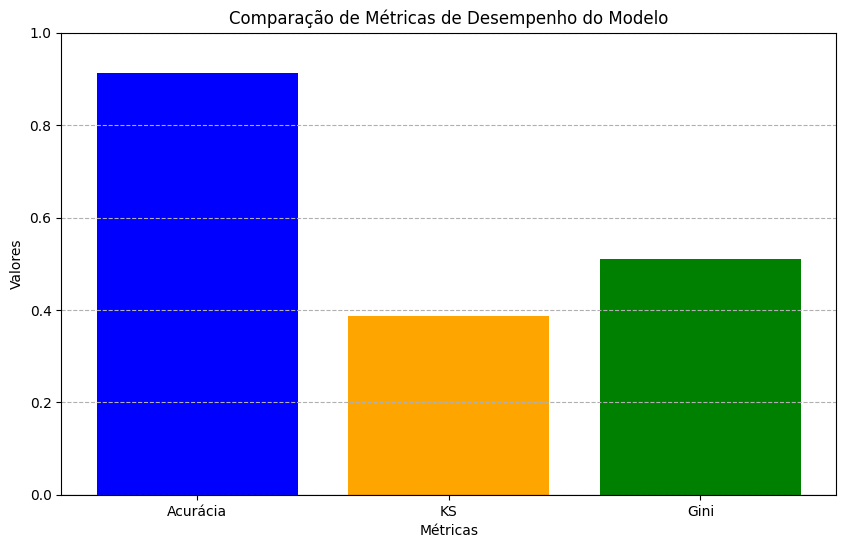

In [86]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(metrics['Metric'], metrics['Value'], color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Comparação de Métricas de Desempenho do Modelo')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.axhline(0, color='black', lw=0.8)
plt.grid(axis='y', linestyle='--')

# Exibindo o gráfico
plt.show()